In [1]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Import the netflix_titles.csv file as a DataFrame
netflix_df = pd.read_csv("Resources/clean_netflix.csv", encoding="utf-8")
netflix_df.head()

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 3,Country 4,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Comma split "Duration"
duration_split = netflix_df["Duration"].str.split(' ', expand=True).rename(columns={0:"Run Length"})
netflix = netflix_df.join([duration_split])
netflix.head()

,Movie/TV Show,Title,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,...,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,Run Length,1
0,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Seasons
1,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,min
2,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,min
3,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,min
4,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,min


In [4]:
# Show datatypes
netflix.dtypes

Movie/TV Show                     object
Title                             object
Country of Production             object
Date Added to Netflix             object
Release Year                       int64
Parental Rating                   object
Duration                          object
Genre                             object
Calendar Date Added to Netflix    object
Year Added to Netflix              int64
Country 1                         object
Country 2                         object
Country 3                         object
Country 4                         object
Country 5                         object
Country 6                         object
Country 7                         object
Country 8                         object
Country 9                         object
Country 10                        object
Country 11                        object
Country 12                        object
Run Length                        object
1                                 object
dtype: object

In [5]:
# Convert "Year Added to Netflix" to integer
netflix["Run Length"] = pd.to_numeric(netflix["Run Length"])
netflix["Year Added to Netflix"] = netflix["Year Added to Netflix"].astype(int)
netflix.dtypes

Movie/TV Show                     object
Title                             object
Country of Production             object
Date Added to Netflix             object
Release Year                       int64
Parental Rating                   object
Duration                          object
Genre                             object
Calendar Date Added to Netflix    object
Year Added to Netflix              int64
Country 1                         object
Country 2                         object
Country 3                         object
Country 4                         object
Country 5                         object
Country 6                         object
Country 7                         object
Country 8                         object
Country 9                         object
Country 10                        object
Country 11                        object
Country 12                        object
Run Length                         int64
1                                 object
dtype: object

In [6]:
# Set index
netflix = netflix.set_index("Title")
netflix.head()

,Movie/TV Show,Country of Production,Date Added to Netflix,Release Year,Parental Rating,Duration,Genre,Calendar Date Added to Netflix,Year Added to Netflix,Country 1,...,Country 5,Country 6,Country 7,Country 8,Country 9,Country 10,Country 11,Country 12,Run Length,1
Title,,,,,,,,,,,,,,,,,,,,,
3%,TV Show,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",August 14,2020,Brazil,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,Seasons
7:19,Movie,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",December 23,2016,Mexico,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93,min
23:59,Movie,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies",December 20,2018,Singapore,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78,min
9,Movie,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...",November 16,2017,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80,min
21,Movie,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,January 1,2020,United States,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123,min


# Number of movies vs. tv shows on Netflix

In [7]:
# Number of movies and tv shows
netflix['Movie/TV Show'].value_counts()

Movie      5143
TV Show    2122
Name: Movie/TV Show, dtype: int64

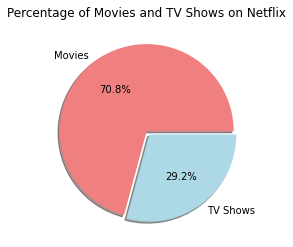

In [9]:
# Create pie chart
labels = ["Movies", "TV Shows"]
sizes = [5143, 2122]
colors = ["lightcoral", "lightblue"]
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0, explode=[0, 0.05], shadow=True)
plt.title("Percentage of Movies and TV Shows on Netflix")
plt.savefig("Images/Percentage of Movies and TV Shows on Netflix.png")
plt.show()

# Number of movies and tv shows added to Netflix each year

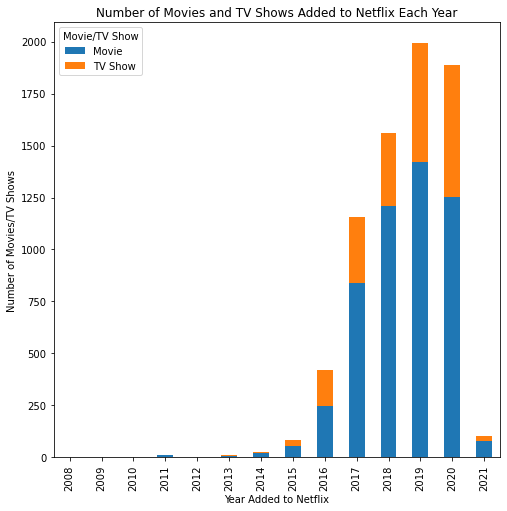

In [11]:
# Create stacked bar chart
netflix.groupby(["Year Added to Netflix", "Movie/TV Show"]).size().unstack().plot(kind='bar', stacked=True,
                legend="upper left", figsize=(8,8))
plt.title("Number of Movies and TV Shows Added to Netflix Each Year")
plt.ylabel("Number of Movies/TV Shows")
plt.savefig("Images/Number of Movies and TV Shows Added to Netflix Each Year.png")
plt.show()

# Length of movies vs. release year

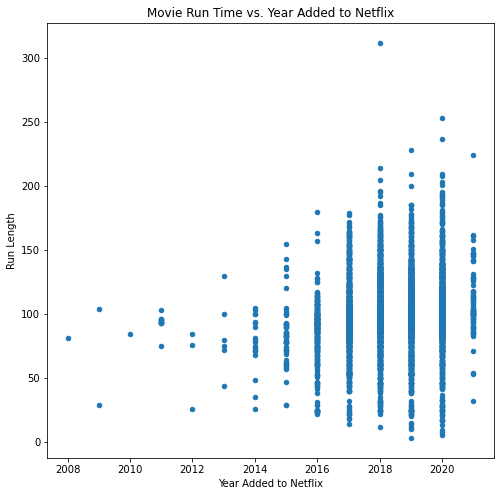

In [12]:
# Create scatterplot
movie_duration = netflix.loc[netflix["Movie/TV Show"] == "Movie"]
movie_duration.plot(kind="scatter", x="Year Added to Netflix", y="Run Length", figsize=(8,8),
                   title="Movie Run Time vs. Year Added to Netflix")
plt.savefig("Images/Movie Run Time vs. Year Added to Netflix.png")
plt.show()

# Length of tv shows vs. release year

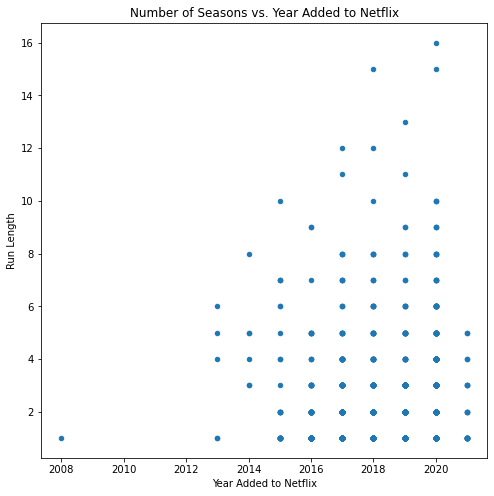

In [13]:
# Create scatterplot
tvshow_duration = netflix.loc[netflix["Movie/TV Show"] == "TV Show"]
tvshow_duration.plot(kind="scatter", x="Year Added to Netflix", y="Run Length", figsize=(8,8),
                   title="Number of Seasons vs. Year Added to Netflix")
plt.savefig("Images/Number of Seasons vs. Year Added to Netflix.png")
plt.show()

# Release year vs. year added to Netflix

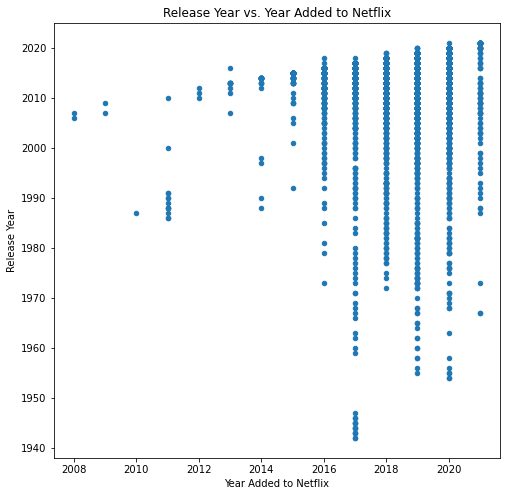

In [16]:
# Create scatterplot
netflix.plot(kind="scatter", x="Year Added to Netflix", y="Release Year", figsize=(8,8),
                   title="Release Year vs. Year Added to Netflix")
plt.savefig("Images/Release Year vs. Year Added to Netflix.png")
plt.show()

# Ratings of movies and tv shows made over time

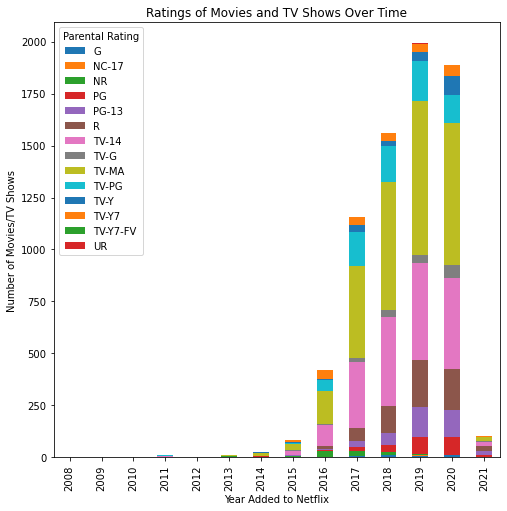

In [17]:
# Create stacked bar graph
netflix.groupby(["Year Added to Netflix", "Parental Rating"]).size().unstack().plot(kind='bar', stacked=True,
                legend="upper left", figsize=(8,8))
                                                                
plt.title("Ratings of Movies and TV Shows Over Time")
plt.ylabel("Number of Movies/TV Shows")
plt.savefig("Images/Ratings of Movies and TV Shows Over Time.png")
plt.show() 